In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# 데이터 가져오기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [20]:
# 검증 세트 만들고 픽셀 강도 0~1로 조정. 레이블 이름도 정해주기
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0
X_test = X_test/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
# 시퀀셜 모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))   # 첫번째 입력층. Flatten층은 입력이미지를 1D로 변환. 따라서 input_shape 파라미터 지정해야 함
model.add(keras.layers.Dense(300, activation='relu'))   # 300개의 뉴런을 가진 Dense 은닉층 추가. relu 활성화함수
model.add(keras.layers.Dense(100, activation='relu'))   # 100개의 뉴런을 가진 Dense 은닉층 추가.
model.add(keras.layers.Dense(10, activation='softmax'))   # 10개의 뉴런을 가진 Dense 출력층 추가. 소프트맥스 활성화함수

# 이렇게도 가능
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  
    keras.layers.Dense(300, activation='relu'),  
    keras.layers.Dense(100, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
    ])
'''

# model.summary() -> 모델의 모든 층의 이름, 크기, 파라미터 개수 등 출력

# 각 층 접근 후 파라미터 얻기
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 모델 컴파일, 훈련, 평가
model.compile(loss='sparse_categorical_crossentropy',  # 레이블이 0~9 중 하나로 배타적이니까 이걸 사용
             optimizer='sgd',  # 기본 확률적 경사 하강법(역전파 알고리즘)
             metrics=['accuracy'])  # 분류기 이므로 정확도를 측정하기 위해 이걸 넣어줌

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.0154 - accuracy: 0.1007 - val_loss: 0.0011 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 9s 171us/sample - loss: 7.5337e-04 - accuracy: 0.1008 - val_loss: 5.2064e-04 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 10s 175us/sample - loss: 4.1369e-04 - accuracy: 0.1008 - val_loss: 3.3925e-04 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 10s 178us/sample - loss: 2.8275e-04 - accuracy: 0.1008 - val_loss: 2.5094e-04 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 11s 193us/sample - loss: 2.1369e-04 - accuracy: 0.1008 - val_loss: 1.9886e-04 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 10s 189us/sample - loss: 1.7117e-04 - accuracy: 0.1008 - val_loss: 1.6449e-04 - val_accuracy: 0.0914
Epoch 

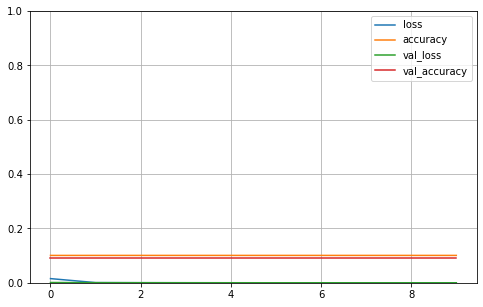

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))  # 검증 세트에 대한 손실과 측정 지표를 담은 history.history
plt.grid(True)
plt.gca().set_ylim(0, 1)  # 수직축의 범위를 0~1사이로 설정
plt.show()

In [30]:
# 돌겠네 ㅅㅂ
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = model.predict_classes(X_new)
print(y_pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 0]
